# CPSC 8430 Deep Learning Homework 1-3: Generalization
 
### Professor: Feng Luo


**Student First Name, LAST NAME, CUID**:  

Joy, YANG, #C91873986

### Three subtask**
- Can network fit random labels?
- Number of parameters v.s. Generalization
- Flatness v.s. Generalization  



### Train on MNIST or CIFAR-10**

### Requirement

- Train on MNIST or CIFAR-10
- Randomly shuffle the label before training. 
- Try to fit the network with these random labels.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm 


In [2]:
if torch.cuda.is_available():
    print("CUDA is available. You can run your code on GPU!")
else:
    print("CUDA is not available. Running on CPU instead.")

CUDA is available. You can run your code on GPU!


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
batch_size_val = 64  

# Data loading with transformations
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, 
                                           transform=transforms.ToTensor())
train_dataset.targets = torch.randint(low=0, high=10, size=train_dataset.targets.shape)
train_data_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size_val, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, 
                                          transform=transforms.ToTensor())
test_dataset.targets = torch.randint(low=0, high=10, size=test_dataset.targets.shape)
test_data_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size_val, shuffle=True)




In [5]:
# Model definition with adjusted parameter names
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.dense_layer1 = nn.Linear(in_features=784, out_features=256)  # Adjusted layer size
        self.dense_layer2 = nn.Linear(in_features=256, out_features=64)   # Adjusted layer size
        self.output_layer = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = self.flatten(x)
        x = nn.functional.relu(self.dense_layer1(x))
        x = nn.functional.relu(self.dense_layer2(x))
        x = self.output_layer(x)
        return x

# Function to compute test loss
def compute_test_loss(loader, net):
    loss_fn = nn.CrossEntropyLoss()
    net.eval()
    total_test_loss = 0.0
    for _, (inputs, targets) in enumerate(loader):
        inputs = inputs.view(-1, 28*28).to(device)
        targets = targets.to(device)
        outputs = net(inputs)
        loss = loss_fn(outputs, targets)
        total_test_loss += loss.item() / len(loader)
    return total_test_loss

# Training setup
net = NeuralNet().to(device)  # Transfer the model to GPU
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)
epochs = 100

epoch_train_losses = []
epoch_test_losses = []



In [6]:
# Training loop with tqdm
for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    # Wrap train_data_loader with tqdm for a progress bar
    progress_bar = tqdm(enumerate(train_data_loader), total=len(train_data_loader), desc=f"Epoch {epoch+1}/{epochs}")
    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.view(-1, 28*28).to(device), targets.to(device)  # Transfer inputs and targets to GPU

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / (batch_idx + 1)})

    avg_train_loss = running_loss / len(train_data_loader)
    avg_test_loss = compute_test_loss(test_data_loader, net)
    
    epoch_train_losses.append(avg_train_loss)
    epoch_test_losses.append(avg_test_loss)
    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch 1/100: 100%|██████████| 938/938 [00:06<00:00, 148.55it/s, loss=2.3]


Epoch 1/100, Train Loss: 2.3032, Test Loss: 2.3030


Epoch 2/100: 100%|██████████| 938/938 [00:05<00:00, 165.29it/s, loss=2.3]


Epoch 2/100, Train Loss: 2.3017, Test Loss: 2.3032


Epoch 3/100: 100%|██████████| 938/938 [00:05<00:00, 169.65it/s, loss=2.3]


Epoch 3/100, Train Loss: 2.3002, Test Loss: 2.3037


Epoch 4/100: 100%|██████████| 938/938 [00:05<00:00, 170.13it/s, loss=2.3]


Epoch 4/100, Train Loss: 2.2981, Test Loss: 2.3050


Epoch 5/100: 100%|██████████| 938/938 [00:05<00:00, 169.74it/s, loss=2.3] 


Epoch 5/100, Train Loss: 2.2956, Test Loss: 2.3059


Epoch 6/100: 100%|██████████| 938/938 [00:05<00:00, 170.72it/s, loss=2.29]


Epoch 6/100, Train Loss: 2.2926, Test Loss: 2.3062


Epoch 7/100: 100%|██████████| 938/938 [00:05<00:00, 170.80it/s, loss=2.29]


Epoch 7/100, Train Loss: 2.2892, Test Loss: 2.3081


Epoch 8/100: 100%|██████████| 938/938 [00:05<00:00, 170.72it/s, loss=2.29]


Epoch 8/100, Train Loss: 2.2853, Test Loss: 2.3103


Epoch 9/100: 100%|██████████| 938/938 [00:05<00:00, 170.03it/s, loss=2.28]


Epoch 9/100, Train Loss: 2.2811, Test Loss: 2.3106


Epoch 10/100: 100%|██████████| 938/938 [00:05<00:00, 170.19it/s, loss=2.28]


Epoch 10/100, Train Loss: 2.2763, Test Loss: 2.3141


Epoch 11/100: 100%|██████████| 938/938 [00:05<00:00, 166.26it/s, loss=2.27]


Epoch 11/100, Train Loss: 2.2713, Test Loss: 2.3183


Epoch 12/100: 100%|██████████| 938/938 [00:05<00:00, 169.35it/s, loss=2.27]


Epoch 12/100, Train Loss: 2.2656, Test Loss: 2.3193


Epoch 13/100: 100%|██████████| 938/938 [00:05<00:00, 167.78it/s, loss=2.26]


Epoch 13/100, Train Loss: 2.2594, Test Loss: 2.3218


Epoch 14/100: 100%|██████████| 938/938 [00:05<00:00, 172.46it/s, loss=2.25]


Epoch 14/100, Train Loss: 2.2535, Test Loss: 2.3249


Epoch 15/100: 100%|██████████| 938/938 [00:05<00:00, 169.88it/s, loss=2.25]


Epoch 15/100, Train Loss: 2.2461, Test Loss: 2.3292


Epoch 16/100: 100%|██████████| 938/938 [00:05<00:00, 170.12it/s, loss=2.24]


Epoch 16/100, Train Loss: 2.2390, Test Loss: 2.3343


Epoch 17/100: 100%|██████████| 938/938 [00:05<00:00, 169.53it/s, loss=2.23]


Epoch 17/100, Train Loss: 2.2316, Test Loss: 2.3364


Epoch 18/100: 100%|██████████| 938/938 [00:05<00:00, 170.32it/s, loss=2.22]


Epoch 18/100, Train Loss: 2.2234, Test Loss: 2.3444


Epoch 19/100: 100%|██████████| 938/938 [00:05<00:00, 170.01it/s, loss=2.22]


Epoch 19/100, Train Loss: 2.2154, Test Loss: 2.3471


Epoch 20/100: 100%|██████████| 938/938 [00:05<00:00, 170.49it/s, loss=2.21]


Epoch 20/100, Train Loss: 2.2071, Test Loss: 2.3527


Epoch 21/100: 100%|██████████| 938/938 [00:05<00:00, 169.00it/s, loss=2.2] 


Epoch 21/100, Train Loss: 2.1991, Test Loss: 2.3562


Epoch 22/100: 100%|██████████| 938/938 [00:05<00:00, 169.58it/s, loss=2.19]


Epoch 22/100, Train Loss: 2.1900, Test Loss: 2.3619


Epoch 23/100: 100%|██████████| 938/938 [00:05<00:00, 163.94it/s, loss=2.18]


Epoch 23/100, Train Loss: 2.1814, Test Loss: 2.3703


Epoch 24/100: 100%|██████████| 938/938 [00:05<00:00, 166.45it/s, loss=2.17]


Epoch 24/100, Train Loss: 2.1729, Test Loss: 2.3752


Epoch 25/100: 100%|██████████| 938/938 [00:05<00:00, 169.70it/s, loss=2.16]


Epoch 25/100, Train Loss: 2.1641, Test Loss: 2.3853


Epoch 26/100: 100%|██████████| 938/938 [00:05<00:00, 162.04it/s, loss=2.16]


Epoch 26/100, Train Loss: 2.1556, Test Loss: 2.3915


Epoch 27/100: 100%|██████████| 938/938 [00:05<00:00, 164.99it/s, loss=2.15]


Epoch 27/100, Train Loss: 2.1462, Test Loss: 2.3953


Epoch 28/100: 100%|██████████| 938/938 [00:05<00:00, 169.90it/s, loss=2.14]


Epoch 28/100, Train Loss: 2.1367, Test Loss: 2.3997


Epoch 29/100: 100%|██████████| 938/938 [00:05<00:00, 169.96it/s, loss=2.13]


Epoch 29/100, Train Loss: 2.1270, Test Loss: 2.4087


Epoch 30/100: 100%|██████████| 938/938 [00:05<00:00, 169.18it/s, loss=2.12]


Epoch 30/100, Train Loss: 2.1183, Test Loss: 2.4177


Epoch 31/100: 100%|██████████| 938/938 [00:05<00:00, 170.00it/s, loss=2.11]


Epoch 31/100, Train Loss: 2.1091, Test Loss: 2.4235


Epoch 32/100: 100%|██████████| 938/938 [00:05<00:00, 169.03it/s, loss=2.1] 


Epoch 32/100, Train Loss: 2.1007, Test Loss: 2.4302


Epoch 33/100: 100%|██████████| 938/938 [00:05<00:00, 172.27it/s, loss=2.09]


Epoch 33/100, Train Loss: 2.0912, Test Loss: 2.4346


Epoch 34/100: 100%|██████████| 938/938 [00:05<00:00, 170.55it/s, loss=2.08]


Epoch 34/100, Train Loss: 2.0824, Test Loss: 2.4452


Epoch 35/100: 100%|██████████| 938/938 [00:05<00:00, 170.27it/s, loss=2.07]


Epoch 35/100, Train Loss: 2.0729, Test Loss: 2.4541


Epoch 36/100: 100%|██████████| 938/938 [00:05<00:00, 169.23it/s, loss=2.06]


Epoch 36/100, Train Loss: 2.0636, Test Loss: 2.4612


Epoch 37/100: 100%|██████████| 938/938 [00:05<00:00, 169.42it/s, loss=2.05]


Epoch 37/100, Train Loss: 2.0547, Test Loss: 2.4701


Epoch 38/100: 100%|██████████| 938/938 [00:05<00:00, 169.57it/s, loss=2.05]


Epoch 38/100, Train Loss: 2.0457, Test Loss: 2.4818


Epoch 39/100: 100%|██████████| 938/938 [00:05<00:00, 169.23it/s, loss=2.04]


Epoch 39/100, Train Loss: 2.0365, Test Loss: 2.4850


Epoch 40/100: 100%|██████████| 938/938 [00:05<00:00, 170.61it/s, loss=2.03]


Epoch 40/100, Train Loss: 2.0276, Test Loss: 2.4972


Epoch 41/100: 100%|██████████| 938/938 [00:05<00:00, 166.68it/s, loss=2.02]


Epoch 41/100, Train Loss: 2.0191, Test Loss: 2.5042


Epoch 42/100: 100%|██████████| 938/938 [00:05<00:00, 169.02it/s, loss=2.01]


Epoch 42/100, Train Loss: 2.0095, Test Loss: 2.5157


Epoch 43/100: 100%|██████████| 938/938 [00:05<00:00, 169.30it/s, loss=2]   


Epoch 43/100, Train Loss: 2.0014, Test Loss: 2.5206


Epoch 44/100: 100%|██████████| 938/938 [00:05<00:00, 169.64it/s, loss=1.99]


Epoch 44/100, Train Loss: 1.9915, Test Loss: 2.5319


Epoch 45/100: 100%|██████████| 938/938 [00:05<00:00, 169.90it/s, loss=1.98]


Epoch 45/100, Train Loss: 1.9831, Test Loss: 2.5417


Epoch 46/100: 100%|██████████| 938/938 [00:05<00:00, 170.34it/s, loss=1.97]


Epoch 46/100, Train Loss: 1.9746, Test Loss: 2.5538


Epoch 47/100: 100%|██████████| 938/938 [00:05<00:00, 169.46it/s, loss=1.97]


Epoch 47/100, Train Loss: 1.9660, Test Loss: 2.5528


Epoch 48/100: 100%|██████████| 938/938 [00:05<00:00, 170.97it/s, loss=1.96]


Epoch 48/100, Train Loss: 1.9575, Test Loss: 2.5788


Epoch 49/100: 100%|██████████| 938/938 [00:05<00:00, 170.04it/s, loss=1.95]


Epoch 49/100, Train Loss: 1.9482, Test Loss: 2.5845


Epoch 50/100: 100%|██████████| 938/938 [00:05<00:00, 169.74it/s, loss=1.94]


Epoch 50/100, Train Loss: 1.9410, Test Loss: 2.5832


Epoch 51/100: 100%|██████████| 938/938 [00:05<00:00, 171.67it/s, loss=1.93]


Epoch 51/100, Train Loss: 1.9322, Test Loss: 2.6002


Epoch 52/100: 100%|██████████| 938/938 [00:05<00:00, 170.58it/s, loss=1.92]


Epoch 52/100, Train Loss: 1.9237, Test Loss: 2.6059


Epoch 53/100: 100%|██████████| 938/938 [00:05<00:00, 169.33it/s, loss=1.92]


Epoch 53/100, Train Loss: 1.9167, Test Loss: 2.6141


Epoch 54/100: 100%|██████████| 938/938 [00:05<00:00, 169.52it/s, loss=1.91]


Epoch 54/100, Train Loss: 1.9074, Test Loss: 2.6145


Epoch 55/100: 100%|██████████| 938/938 [00:05<00:00, 170.58it/s, loss=1.9] 


Epoch 55/100, Train Loss: 1.8995, Test Loss: 2.6341


Epoch 56/100: 100%|██████████| 938/938 [00:05<00:00, 169.87it/s, loss=1.89]


Epoch 56/100, Train Loss: 1.8914, Test Loss: 2.6374


Epoch 57/100: 100%|██████████| 938/938 [00:05<00:00, 169.22it/s, loss=1.88]


Epoch 57/100, Train Loss: 1.8821, Test Loss: 2.6566


Epoch 58/100: 100%|██████████| 938/938 [00:05<00:00, 169.31it/s, loss=1.88]


Epoch 58/100, Train Loss: 1.8758, Test Loss: 2.6563


Epoch 59/100: 100%|██████████| 938/938 [00:05<00:00, 168.29it/s, loss=1.87]


Epoch 59/100, Train Loss: 1.8668, Test Loss: 2.6652


Epoch 60/100: 100%|██████████| 938/938 [00:05<00:00, 168.91it/s, loss=1.86]


Epoch 60/100, Train Loss: 1.8586, Test Loss: 2.6794


Epoch 61/100: 100%|██████████| 938/938 [00:05<00:00, 169.13it/s, loss=1.85]


Epoch 61/100, Train Loss: 1.8518, Test Loss: 2.6848


Epoch 62/100: 100%|██████████| 938/938 [00:05<00:00, 169.96it/s, loss=1.84]


Epoch 62/100, Train Loss: 1.8437, Test Loss: 2.6905


Epoch 63/100: 100%|██████████| 938/938 [00:05<00:00, 169.51it/s, loss=1.84]


Epoch 63/100, Train Loss: 1.8356, Test Loss: 2.7127


Epoch 64/100: 100%|██████████| 938/938 [00:05<00:00, 170.65it/s, loss=1.83]


Epoch 64/100, Train Loss: 1.8295, Test Loss: 2.7156


Epoch 65/100: 100%|██████████| 938/938 [00:05<00:00, 170.28it/s, loss=1.82]


Epoch 65/100, Train Loss: 1.8203, Test Loss: 2.7308


Epoch 66/100: 100%|██████████| 938/938 [00:05<00:00, 170.05it/s, loss=1.81]


Epoch 66/100, Train Loss: 1.8130, Test Loss: 2.7312


Epoch 67/100: 100%|██████████| 938/938 [00:05<00:00, 166.41it/s, loss=1.81]


Epoch 67/100, Train Loss: 1.8056, Test Loss: 2.7511


Epoch 68/100: 100%|██████████| 938/938 [00:05<00:00, 169.66it/s, loss=1.8] 


Epoch 68/100, Train Loss: 1.7986, Test Loss: 2.7514


Epoch 69/100: 100%|██████████| 938/938 [00:05<00:00, 169.54it/s, loss=1.79]


Epoch 69/100, Train Loss: 1.7910, Test Loss: 2.7672


Epoch 70/100: 100%|██████████| 938/938 [00:05<00:00, 171.96it/s, loss=1.78]


Epoch 70/100, Train Loss: 1.7836, Test Loss: 2.7733


Epoch 71/100: 100%|██████████| 938/938 [00:05<00:00, 169.16it/s, loss=1.78]


Epoch 71/100, Train Loss: 1.7761, Test Loss: 2.7945


Epoch 72/100: 100%|██████████| 938/938 [00:05<00:00, 169.60it/s, loss=1.77]


Epoch 72/100, Train Loss: 1.7696, Test Loss: 2.7903


Epoch 73/100: 100%|██████████| 938/938 [00:05<00:00, 169.39it/s, loss=1.76]


Epoch 73/100, Train Loss: 1.7618, Test Loss: 2.8075


Epoch 74/100: 100%|██████████| 938/938 [00:05<00:00, 169.45it/s, loss=1.75]


Epoch 74/100, Train Loss: 1.7550, Test Loss: 2.7988


Epoch 75/100: 100%|██████████| 938/938 [00:05<00:00, 169.38it/s, loss=1.75]


Epoch 75/100, Train Loss: 1.7477, Test Loss: 2.8248


Epoch 76/100: 100%|██████████| 938/938 [00:05<00:00, 169.37it/s, loss=1.74]


Epoch 76/100, Train Loss: 1.7409, Test Loss: 2.8294


Epoch 77/100: 100%|██████████| 938/938 [00:05<00:00, 168.94it/s, loss=1.73]


Epoch 77/100, Train Loss: 1.7348, Test Loss: 2.8524


Epoch 78/100: 100%|██████████| 938/938 [00:05<00:00, 170.30it/s, loss=1.73]


Epoch 78/100, Train Loss: 1.7274, Test Loss: 2.8542


Epoch 79/100: 100%|██████████| 938/938 [00:05<00:00, 170.45it/s, loss=1.72]


Epoch 79/100, Train Loss: 1.7198, Test Loss: 2.8651


Epoch 80/100: 100%|██████████| 938/938 [00:05<00:00, 169.16it/s, loss=1.71]


Epoch 80/100, Train Loss: 1.7141, Test Loss: 2.8696


Epoch 81/100: 100%|██████████| 938/938 [00:05<00:00, 169.29it/s, loss=1.71]


Epoch 81/100, Train Loss: 1.7078, Test Loss: 2.8866


Epoch 82/100: 100%|██████████| 938/938 [00:05<00:00, 170.30it/s, loss=1.7] 


Epoch 82/100, Train Loss: 1.6991, Test Loss: 2.8996


Epoch 83/100: 100%|██████████| 938/938 [00:05<00:00, 169.21it/s, loss=1.69]


Epoch 83/100, Train Loss: 1.6926, Test Loss: 2.9132


Epoch 84/100: 100%|██████████| 938/938 [00:05<00:00, 169.74it/s, loss=1.69]


Epoch 84/100, Train Loss: 1.6873, Test Loss: 2.9458


Epoch 85/100: 100%|██████████| 938/938 [00:05<00:00, 169.10it/s, loss=1.68]


Epoch 85/100, Train Loss: 1.6823, Test Loss: 2.9175


Epoch 86/100: 100%|██████████| 938/938 [00:05<00:00, 170.10it/s, loss=1.67]


Epoch 86/100, Train Loss: 1.6715, Test Loss: 2.9377


Epoch 87/100: 100%|██████████| 938/938 [00:05<00:00, 170.16it/s, loss=1.67]


Epoch 87/100, Train Loss: 1.6678, Test Loss: 2.9528


Epoch 88/100: 100%|██████████| 938/938 [00:05<00:00, 169.57it/s, loss=1.66]


Epoch 88/100, Train Loss: 1.6597, Test Loss: 2.9759


Epoch 89/100: 100%|██████████| 938/938 [00:05<00:00, 169.12it/s, loss=1.66]


Epoch 89/100, Train Loss: 1.6553, Test Loss: 2.9642


Epoch 90/100: 100%|██████████| 938/938 [00:05<00:00, 169.67it/s, loss=1.65]


Epoch 90/100, Train Loss: 1.6486, Test Loss: 2.9738


Epoch 91/100: 100%|██████████| 938/938 [00:05<00:00, 169.93it/s, loss=1.64]


Epoch 91/100, Train Loss: 1.6422, Test Loss: 2.9955


Epoch 92/100: 100%|██████████| 938/938 [00:05<00:00, 170.72it/s, loss=1.64]


Epoch 92/100, Train Loss: 1.6380, Test Loss: 3.0028


Epoch 93/100: 100%|██████████| 938/938 [00:05<00:00, 169.47it/s, loss=1.63]


Epoch 93/100, Train Loss: 1.6295, Test Loss: 3.0091


Epoch 94/100: 100%|██████████| 938/938 [00:05<00:00, 169.75it/s, loss=1.62]


Epoch 94/100, Train Loss: 1.6225, Test Loss: 3.0224


Epoch 95/100: 100%|██████████| 938/938 [00:05<00:00, 169.36it/s, loss=1.62]


Epoch 95/100, Train Loss: 1.6177, Test Loss: 3.0376


Epoch 96/100: 100%|██████████| 938/938 [00:05<00:00, 169.98it/s, loss=1.61]


Epoch 96/100, Train Loss: 1.6118, Test Loss: 3.0383


Epoch 97/100: 100%|██████████| 938/938 [00:05<00:00, 169.97it/s, loss=1.61]


Epoch 97/100, Train Loss: 1.6066, Test Loss: 3.0761


Epoch 98/100: 100%|██████████| 938/938 [00:05<00:00, 169.41it/s, loss=1.6] 


Epoch 98/100, Train Loss: 1.5997, Test Loss: 3.0687


Epoch 99/100: 100%|██████████| 938/938 [00:05<00:00, 168.26it/s, loss=1.59]


Epoch 99/100, Train Loss: 1.5938, Test Loss: 3.0750


Epoch 100/100: 100%|██████████| 938/938 [00:05<00:00, 170.35it/s, loss=1.59]


Epoch 100/100, Train Loss: 1.5875, Test Loss: 3.0973


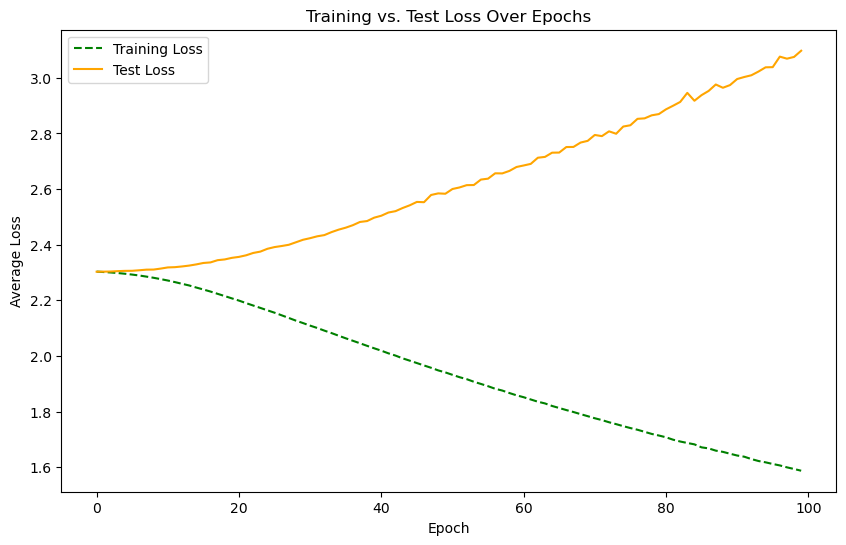

In [7]:
# Plotting the training and test losses
plt.figure(figsize=(10, 6))
plt.plot(epoch_train_losses, label='Training Loss', linestyle='--',  color='green')
plt.plot(epoch_test_losses, label='Test Loss', linestyle='-',  color='orange')
plt.title("Training vs. Test Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend()
plt.show()